       RI     Na   Mg   Al     Si    K    Ca   Ba   Fe  Type
0  1.5151  13.34  0.0  1.0  72.56  0.0  10.0  0.0  0.0     1
1  1.5151  13.34  0.0  1.0  72.56  0.0  10.0  0.0  0.0     2
2  1.5160  13.53  0.0  1.0  72.68  0.0  10.0  0.0  0.0     1
3  1.5170  13.25  0.0  1.0  72.80  0.0  10.0  0.0  0.0     3
4  1.5180  13.00  0.0  1.0  72.70  0.0  10.0  0.0  0.0     5

Shape of the dataset: (10, 10)

Missing values in each column:
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

Numeric columns: ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']


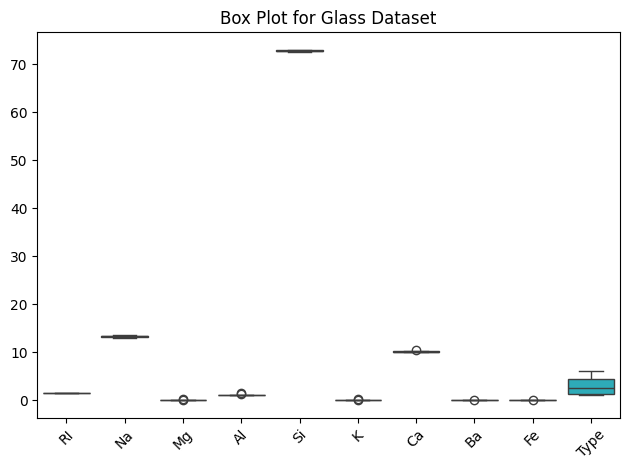

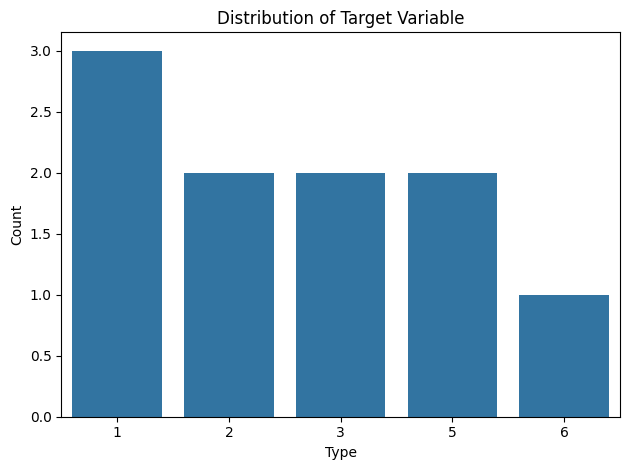

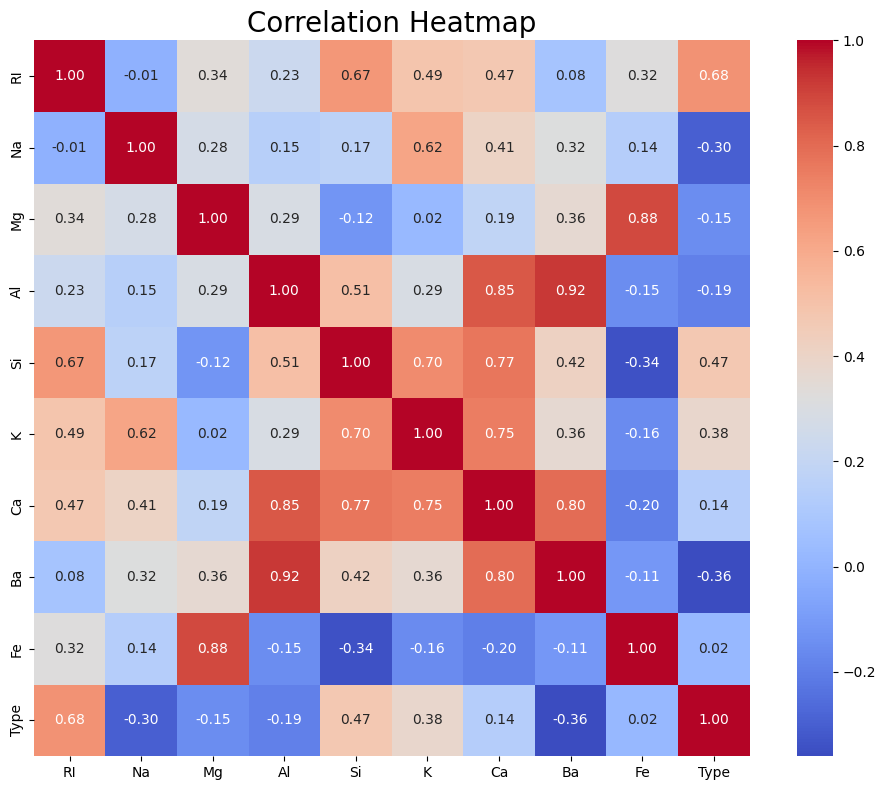


Random Forest Classifier Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       1.0
           2       0.00      0.00      0.00       1.0
           3       0.00      1.00      0.00       0.0
           5       1.00      0.00      0.00       1.0

    accuracy                           0.00       3.0
   macro avg       0.25      0.25      0.00       3.0
weighted avg       0.33      0.00      0.00       3.0

[[0 0 1 0]
 [1 0 0 0]
 [0 0 0 0]
 [0 1 0 0]]

Gradient Boosting Classifier Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       1.00      0.00      0.00         1
           3       0.00      1.00      0.00         0
           5       1.00      1.00      1.00         1

    accuracy                           0.33         3
   macro avg       0.50      0.50      0.25         3
weighted avg       0.67      0.33      0.33         3

[[0 0 1 0]
 [

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Step 1: Manually create the DataFrame with sample data
data_dict = {
    'RI': [1.5151, 1.5151, 1.5160, 1.5170, 1.5180, 1.5185, 1.5190, 1.5200, 1.5205, 1.5210],
    'Na': [13.34, 13.34, 13.53, 13.25, 13.00, 13.50, 13.20, 13.40, 13.10, 13.60],
    'Mg': [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.2, 0.0, 0.0],
    'Al': [1.0, 1.0, 1.0, 1.0, 1.0, 1.5, 1.0, 1.0, 1.2, 1.0],
    'Si': [72.56, 72.56, 72.68, 72.80, 72.70, 72.90, 72.75, 72.60, 72.85, 72.95],
    'K': [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.2],
    'Ca': [10.0, 10.0, 10.0, 10.0, 10.0, 10.5, 10.0, 10.0, 10.2, 10.3],
    'Ba': [0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0, 0.0, 0.0],
    'Fe': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.0],
    'Type': [1, 2, 1, 3, 5, 1, 2, 3, 5, 6]  # Example type values
}

# Create DataFrame
data = pd.DataFrame(data_dict)

# Step 2: Verify the DataFrame
print(data.head())
print("\nShape of the dataset:", data.shape)

# Step 3: Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Step 4: Exploratory Data Analysis
numeric_columns = data.select_dtypes(include=[float, int]).columns.tolist()
print("\nNumeric columns:", numeric_columns)

plt.figure()
sns.boxplot(data=data[numeric_columns])
plt.title('Box Plot for Glass Dataset')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
sns.countplot(data=data, x='Type')
plt.title('Distribution of Target Variable')
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

if len(numeric_columns) > 0:
    correlation_matrix = data[numeric_columns].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Correlation Heatmap', fontsize=20)
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found for correlation heatmap.")

# Step 5: Prepare data for modeling
X = data[numeric_columns[:-1]]  # Exclude the 'Type' column for features
y = data['Type']

# Optional: Feature scaling (if desired for models like Gradient Boosting)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Step 6: Bagging with Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest Classifier Report:")
print(classification_report(y_test, y_pred_rf, zero_division=1))  # Set to 1 for precision/recall
print(confusion_matrix(y_test, y_pred_rf))


# Step 7: Boosting with Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

print("\nGradient Boosting Classifier Report:")
print(classification_report(y_test, y_pred_gb, zero_division=1))
print(confusion_matrix(y_test, y_pred_gb))


# New Section